### Understanding

This dataset consists of a group of breast cancer patients, who had surgery to remove their tumour. The dataset consists of the following variables:

Patient_ID: unique identifier id of a patient

Age: age at diagnosis (Years)

Gender: Male/Female

Protein1, Protein2, Protein3, Protein4: expression levels (undefined units)

Tumour_Stage: I, II, III

Histology: Infiltrating Ductal Carcinoma, Infiltrating Lobular Carcinoma, Mucinous Carcinoma

ER status: Positive/Negative

PR status: Positive/Negative

HER2 status: Positive/Negative

Surgery_type: Lumpectomy, Simple Mastectomy, Modified Radical Mastectomy, Other

DateofSurgery: Date on which surgery was performed (in DD-MON-YY)

DateofLast_Visit: Date of last visit (in DD-MON-YY) [can be null, in case the patient didn’t visited again after the surgery]

Patient_Status: Alive/Dead [can be null, in case the patient didn’t visited again after the surgery and there is no information available whether the patient is alive or dead].

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import xgboost
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [123]:
df = pd.read_csv("C:/Users/TANVI/Desktop/Python Projects/BRCA.csv")

In [124]:
df.head(2)

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead


In [125]:
df.shape

(341, 16)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    float64
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

In [127]:
df.describe()

,Age,Protein1,Protein2,Protein3,Protein4
count,334.000000,334.000000,334.000000,334.000000,334.000000
mean,58.886228,-0.029991,0.946896,-0.090204,0.009819
std,12.961212,0.563588,0.911637,0.585175,0.629055
min,29.000000,-2.340900,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.358888,0.362173,-0.513748,-0.377090
50%,58.000000,0.006129,0.992805,-0.173180,0.041768
75%,68.000000,0.343598,1.627900,0.278353,0.425630
max,90.000000,1.593600,3.402200,2.193400,1.629900


In [128]:
df_copy = df.copy(deep=True)

### Data Pre- Processing - Missing, Duplicate Values

In [129]:
df_copy.isnull().sum()

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

In [130]:
df_copy = df_copy.dropna()

In [131]:
df_copy.isnull().sum()

Patient_ID            0
Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Patient_Status        0
dtype: int64

In [132]:
df_copy[df_copy.duplicated()].head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status


In [133]:
df_copy.shape

(317, 16)

In [134]:
df_copy.head(2)

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead


## EDA and Feature Engineering 

### balanced / imbalanced?

<AxesSubplot:xlabel='Patient_Status', ylabel='count'>

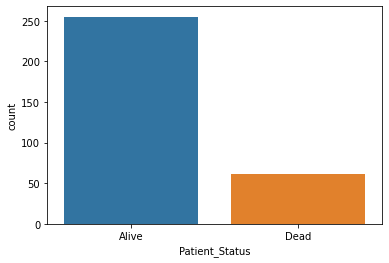

In [135]:
sns.countplot(df_copy.Patient_Status)

In [136]:
# Imbalanced

#### 1. Age 

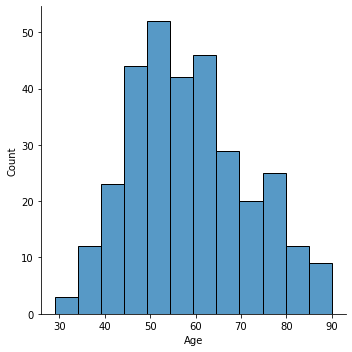

In [137]:
sns.displot(df_copy.Age)

<AxesSubplot:xlabel='Age'>

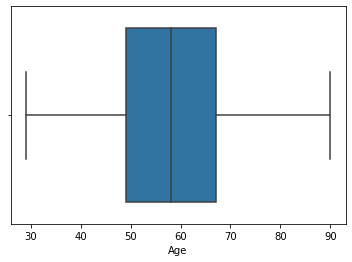

In [138]:
sns.boxplot(df_copy.Age)

In [139]:
# no outliers, max people from the age group 45- 60

#### 2. Gender

<AxesSubplot:xlabel='Gender', ylabel='count'>

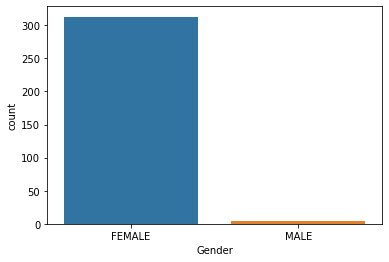

In [140]:
sns.countplot(x=df_copy.Gender)

In [141]:
label_encoder = preprocessing.LabelEncoder()
df_copy["Gender"] = label_encoder.fit_transform(df_copy["Gender"])

In [142]:
df_copy["Gender"].unique()

array([0, 1])

<AxesSubplot:xlabel='Gender', ylabel='count'>

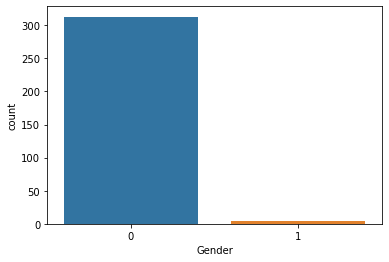

In [143]:
sns.countplot(x=df_copy.Gender)

#### 3.  Protein 1,2,3

<AxesSubplot:xlabel='Protein1'>

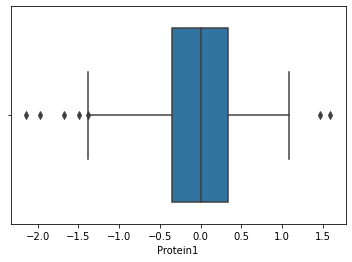

In [144]:
sns.boxplot(df_copy.Protein1)

<AxesSubplot:xlabel='Protein2'>

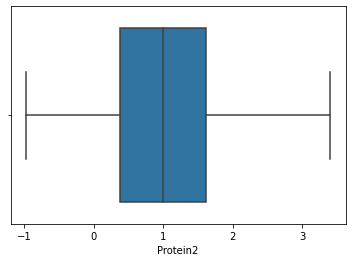

In [145]:
sns.boxplot(df_copy.Protein2)

<AxesSubplot:xlabel='Protein3'>

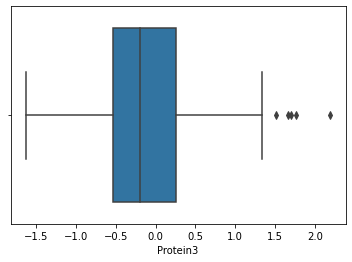

In [146]:
sns.boxplot(df_copy.Protein3)

#### 4. Tumour Stage

In [147]:
df_copy["Tumour_Stage"] = df_copy["Tumour_Stage"].map({"I": 1, "II": 2, "III": 3})

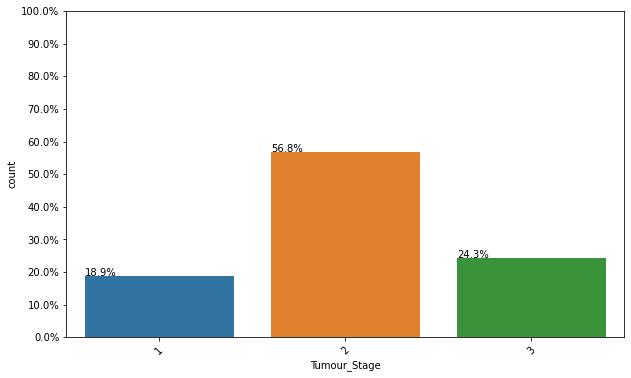

In [148]:
plt.figure(figsize=(10,6))
plot=sns.countplot(x="Tumour_Stage",data=df_copy)
plot.set_xticklabels(plot.get_xticklabels(),rotation=45)
total=len(df_copy["Tumour_Stage"])
for p in plot.patches:
    plot.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x(), p.get_height()))
plot.yaxis.set_ticks(np.linspace(0, total, 11))
plot.set_yticklabels(map('{:.1f}%'.format, 100*plot.yaxis.get_majorticklocs()/total))
plt.show()
plt.show()

#### 5. Histology

In [149]:
df_copy.Histology.value_counts()

Infiltrating Ductal Carcinoma     224
Infiltrating Lobular Carcinoma     81
Mucinous Carcinoma                 12
Name: Histology, dtype: int64

In [150]:
df_copy["Histology"] = df_copy["Histology"].map({"Infiltrating Ductal Carcinoma": 1, 
                                           "Infiltrating Lobular Carcinoma": 2, "Mucinous Carcinoma": 3})

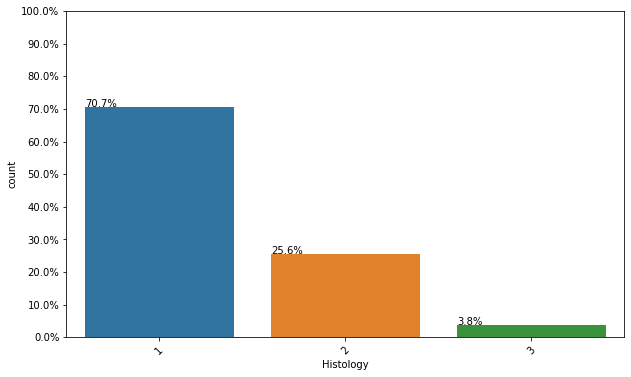

In [151]:
plt.figure(figsize=(10,6))
plot=sns.countplot(x="Histology",data=df_copy)
plot.set_xticklabels(plot.get_xticklabels(),rotation=45)
total=len(df_copy["Histology"])
for p in plot.patches:
    plot.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x(), p.get_height()))
plot.yaxis.set_ticks(np.linspace(0, total, 11))
plot.set_yticklabels(map('{:.1f}%'.format, 100*plot.yaxis.get_majorticklocs()/total))
plt.show()
plt.show()

#### 6. ER Status, PR Status, HER2 Status

In [152]:
df_copy["ER status"] = df_copy["ER status"].map({"Positive": 1})
df_copy["PR status"] = df_copy["PR status"].map({"Positive": 1})
df_copy["HER2 status"] = df_copy["HER2 status"].map({"Positive": 1, "Negative": 2})

<AxesSubplot:xlabel='ER status', ylabel='count'>

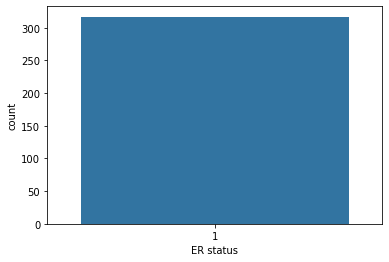

In [153]:
sns.countplot(df_copy["ER status"])

<AxesSubplot:xlabel='PR status', ylabel='count'>

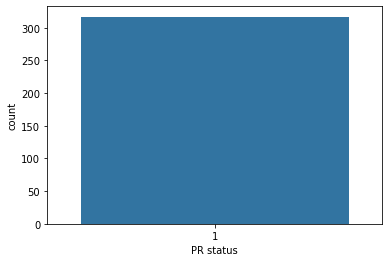

In [154]:
sns.countplot(df_copy["PR status"])

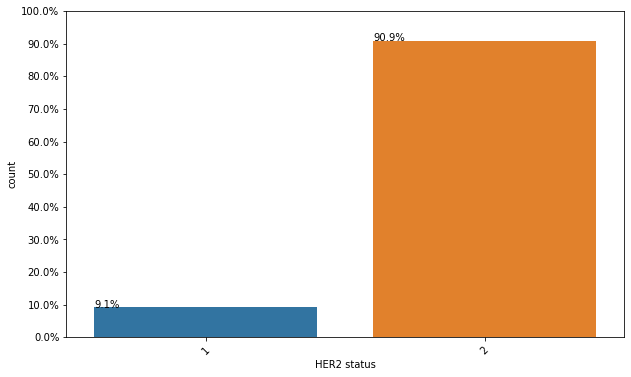

In [155]:
plt.figure(figsize=(10,6))
plot=sns.countplot(x="HER2 status",data=df_copy)
plot.set_xticklabels(plot.get_xticklabels(),rotation=45)
total=len(df_copy["HER2 status"])
for p in plot.patches:
    plot.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x(), p.get_height()))
plot.yaxis.set_ticks(np.linspace(0, total, 11))
plot.set_yticklabels(map('{:.1f}%'.format, 100*plot.yaxis.get_majorticklocs()/total))
plt.show()
plt.show()

#### 7. Surgery Type

In [156]:
df_copy.Surgery_type.value_counts()

Other                          97
Modified Radical Mastectomy    89
Lumpectomy                     66
Simple Mastectomy              65
Name: Surgery_type, dtype: int64

In [157]:
df_copy["Surgery_type"] = df_copy["Surgery_type"].map({"Other": 1, "Modified Radical Mastectomy": 2, 
                                                 "Lumpectomy": 3, "Simple Mastectomy": 4})

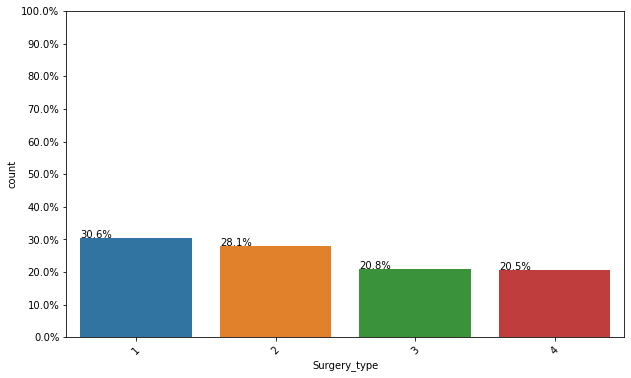

In [158]:
plt.figure(figsize=(10,6))
plot=sns.countplot(x="Surgery_type",data=df_copy)
plot.set_xticklabels(plot.get_xticklabels(),rotation=45)
total=len(df_copy["Surgery_type"])
for p in plot.patches:
    plot.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x(), p.get_height()))
plot.yaxis.set_ticks(np.linspace(0, total, 11))
plot.set_yticklabels(map('{:.1f}%'.format, 100*plot.yaxis.get_majorticklocs()/total))
plt.show()
plt.show()

In [159]:
df_copy["Date_of_Surgery"] = pd.to_datetime(df_copy["Date_of_Surgery"])
df_copy["Date_of_Last_Visit"] = pd.to_datetime(df_copy["Date_of_Last_Visit"])

In [117]:
df_copy.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,0,0.080353,0.42638,0.54715,0.273680,3,1,1,1,2,2,2017-01-15,2017-06-19,Alive
1,TCGA-EW-A1OX,43.0,0,-0.420320,0.57807,0.61447,-0.031505,2,3,1,1,2,3,2017-04-26,2018-11-09,Dead
2,TCGA-A8-A079,69.0,0,0.213980,1.31140,-0.32747,-0.234260,3,1,1,1,2,1,2017-09-08,2018-06-09,Alive
3,TCGA-D8-A1XR,56.0,0,0.345090,-0.21147,-0.19304,0.124270,2,1,1,1,2,2,2017-01-25,2017-07-12,Alive
4,TCGA-BH-A0BF,56.0,0,0.221550,1.90680,0.52045,-0.311990,2,1,1,1,2,1,2017-05-06,2019-06-27,Dead


### Bivariate EDA

In [ ]:
Age	Gender	Tumour_Stage	Histology	Surgery_type	Patient_Status

In [164]:
# Gender vs Tumour_Stage
# Patient Status vs Tumour_ Stage

In [165]:
# categorical vs categorical - crosstabs, bar plots

In [166]:
pd.crosstab(df_copy["Gender"],df_copy["Tumour_Stage"])

Tumour_Stage,1,2,3
Gender,,,
0,60,177,76
1,0,3,1


In [176]:
pd.crosstab(df_copy["Patient_Status"],df_copy["Tumour_Stage"])

Tumour_Stage,1,2,3
Patient_Status,,,
Alive,51,144,60
Dead,9,36,17


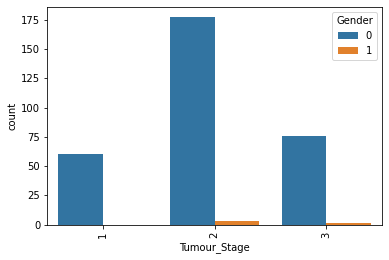

In [175]:
sns.countplot(x="Tumour_Stage", data=df_copy, hue="Gender")
plt.xticks(rotation =90)
plt.show()

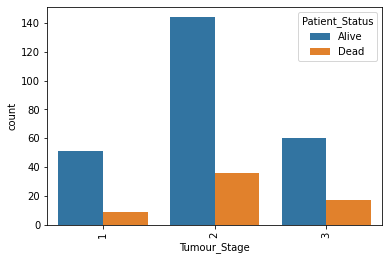

In [177]:
sns.countplot(x="Tumour_Stage", data=df_copy, hue="Patient_Status")
plt.xticks(rotation =90)
plt.show()

In [ ]:
# Gender vs Histology
# Patient_Status vs Histology

In [179]:
pd.crosstab(df_copy["Gender"],df_copy["Histology"])

Histology,1,2,3
Gender,,,
0,222,79,12
1,2,2,0


In [180]:
pd.crosstab(df_copy["Patient_Status"],df_copy["Histology"])

Histology,1,2,3
Patient_Status,,,
Alive,179,67,9
Dead,45,14,3


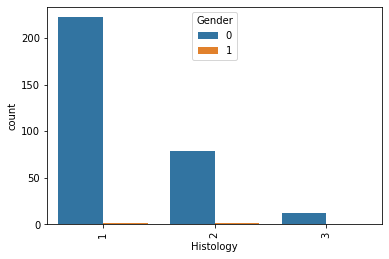

In [169]:
sns.countplot(x="Histology", data=df_copy, hue="Gender")
plt.xticks(rotation =90)
plt.show()

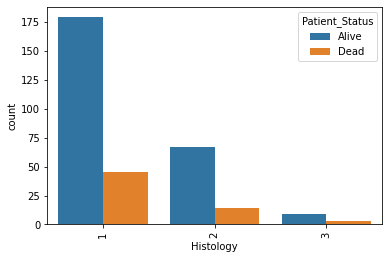

In [181]:
sns.countplot(x="Histology", data=df_copy, hue="Patient_Status")
plt.xticks(rotation =90)
plt.show()

In [182]:
# Gender vs Surgery Type
# Patient_Status vs Surgery Type

In [170]:
pd.crosstab(df_copy["Gender"],df_copy["Surgery_type"])

Surgery_type,1,2,3,4
Gender,,,,
0,96,87,66,64
1,1,2,0,1


In [183]:
pd.crosstab(df_copy["Patient_Status"],df_copy["Surgery_type"])

Surgery_type,1,2,3,4
Patient_Status,,,,
Alive,73,72,57,53
Dead,24,17,9,12


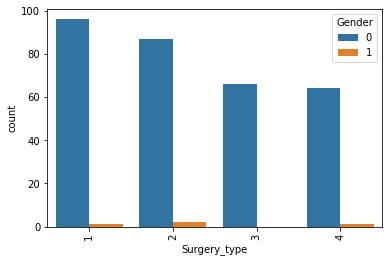

In [171]:
sns.countplot(x="Surgery_type", data=df_copy, hue="Gender")
plt.xticks(rotation =90)
plt.show()

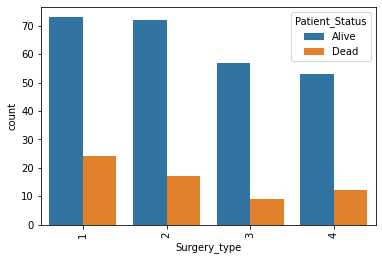

In [184]:
sns.countplot(x="Surgery_type", data=df_copy, hue="Patient_Status")
plt.xticks(rotation =90)
plt.show()

In [ ]:
# Gender vs Patient Status

In [172]:
pd.crosstab(df_copy["Gender"],df_copy["Patient_Status"])

Patient_Status,Alive,Dead
Gender,,
0,252,61
1,3,1


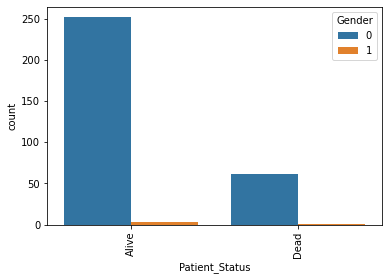

In [173]:
sns.countplot(x="Patient_Status", data=df_copy, hue="Gender")
plt.xticks(rotation =90)
plt.show()

## Train-Test Split

In [185]:
X = np.array(df_copy[['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3','Protein4', 
                   'Tumour_Stage', 'Histology', 'ER status', 'PR status', 
                   'HER2 status', 'Surgery_type']])
y = np.array(df_copy[['Patient_Status']])

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [187]:
print("Shape of training set X is ",X_train.shape)
print("Shape of test set X is ",X_test.shape)
print("Shape of training set y is ",y_train.shape)
print("Shape of test set y is ",y_test.shape)

Shape of training set X is  (221, 12)
Shape of test set X is  (96, 12)
Shape of training set y is  (221, 1)
Shape of test set y is  (96, 1)


In [192]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

SVC()

In [193]:
y_predicted=model.predict(X_test)

In [194]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predicted)

0.8333333333333334

In [196]:
confusion_matrix(y_test,y_predicted)

array([[80,  0],
       [16,  0]], dtype=int64)

In [195]:
features = np.array([[36.0, 1, 0.080353, 0.42638, 0.54715, 0.273680, 3, 1, 1, 1, 2, 2,]])
print(model.predict(features))

['Alive']
